In [178]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

In [179]:
Min, Max, N = 0.,40.,60
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [180]:
def h1(y):
    return 100.
def h2(y):
    return 0.
def h3(x):
    return 0.
def h4(x):
    return 0.

In [181]:
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [182]:
def GetRelaxation(T, omega,Nit = int(1e5), tolerancia = 1e-2):
    
    itmax = 0
    
    for it in(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
       # print(T)
       # print(it)
        
        if np.abs(dmax) < tolerancia:
            
            itmax = it
            break
            
    return T,itmax


    



In [183]:
numero_iteraciones=[]
valores_gamma_=np.linspace(1.1,1.9,9)

for variable in valores_gamma_:
    
    T = InitT()
    Tf1,_ =  GetRelaxation(T,variable)
    numero_iteraciones.append(_)

print(numero_iteraciones)
    



[750, 656, 568, 483, 402, 323, 244, 164, 61]


<IPython.core.display.Javascript object>


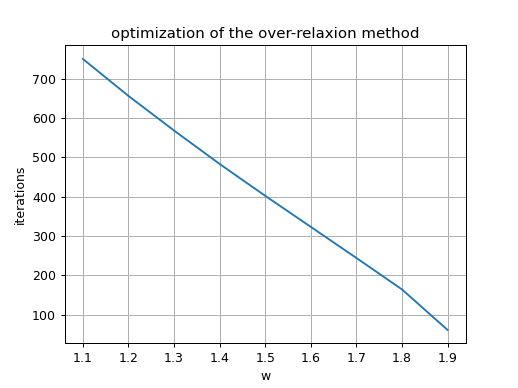

Text(0.5, 1.0, 'optimization of the over-relaxion method')

In [184]:
plt.figure()
plt.plot(valores_gamma_,numero_iteraciones)
plt.grid()
plt.xlabel("w")
plt.ylabel("iterations")
plt.title("optimization of the over-relaxion method")